In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


sns.set(style="ticks", palette="colorblind")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

# Data Setup

In [29]:
df_train = pd.read_csv('tap_fun_train.csv')
df_train.head(5)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,wound_cavalry_reduce_value,wound_shaman_add_value,wound_shaman_reduce_value,general_acceleration_add_value,general_acceleration_reduce_value,building_acceleration_add_value,building_acceleration_reduce_value,reaserch_acceleration_add_value,reaserch_acceleration_reduce_value,training_acceleration_add_value,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,bd_watchtower_level,bd_magic_coin_tree_level,bd_hall_of_war_level,bd_market_level,bd_hero_gacha_level,bd_hero_strengthen_level,bd_hero_pve_level,sr_scout_level,sr_training_speed_level,sr_infantry_tier_2_level,sr_cavalry_tier_2_level,sr_shaman_tier_2_level,sr_infantry_atk_level,sr_cavalry_atk_level,sr_shaman_atk_level,sr_infantry_tier_3_level,sr_cavalry_tier_3_level,sr_shaman_tier_3_level,sr_troop_defense_level,sr_infantry_def_level,sr_cavalry_def_level,sr_shaman_def_level,sr_infantry_hp_level,sr_cavalry_hp_level,sr_shaman_hp_level,sr_infantry_tier_4_level,sr_cavalry_tier_4_level,sr_shaman_tier_4_level,sr_troop_attack_level,sr_construction_speed_level,sr_hide_storage_level,sr_troop_consumption_level,sr_rss_a_prod_levell,sr_rss_b_prod_level,sr_rss_c_prod_level,sr_rss_d_prod_level,sr_rss_a_gather_level,sr_rss_b_gather_level,sr_rss_c_gather_level,sr_rss_d_gather_level,sr_troop_load_level,sr_rss_e_gather_level,sr_rss_e_prod_level,sr_outpost_durability_level,sr_outpost_tier_2_level,sr_healing_space_level,sr_gathering_hunter_buff_level,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,50,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [30]:
#check for NULL value
df_train.isnull().any().any()

False

In [34]:
#check for duplicates
df_train.isnull().any().any()

False

In [35]:
df_train['register_time'] = pd.to_datetime(df_train['register_time'])

## 1. New User Analysis

Text(0.5, 1.0, 'User Registered by Month')

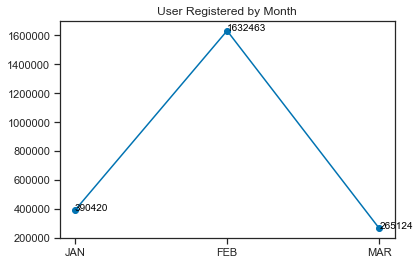

In [48]:
# user registered count by month
month_x = df_train['register_time'].dt.month.unique()
month_y = df_train['user_id'].groupby(df_train['register_time'].dt.month).count()
user_month = plt.plot(sorted(month_x), month_y, marker='o')
plt.xticks([1, 2, 3], ['JAN', 'FEB', 'MAR'])
for x, y in zip (sorted(month_x), month_y):
    plt.text(x, y, str(y), c='black')

plt.title('User Registered by Month')

### Insight: 
User registered significantly increased in Feburary, indicating succesful marketing campaign. However, user quality needs to be evaluated by looking at metrics like APRU, Active analysis etc to further determine channel quality

Text(0.5, 1.0, 'User Registered by Weekday')

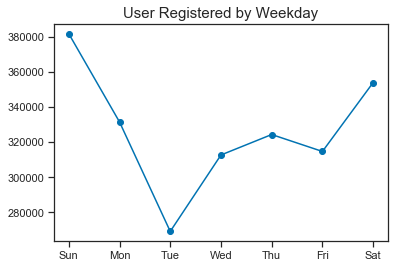

In [49]:
# user registered count by weekday
import calendar
calendar.setfirstweekday(calendar.SUNDAY)

weekday_x = sorted(df_train['register_time'].dt.weekday.unique())
weekday_y = df_train['user_id'].groupby(df_train['register_time'].dt.weekday).count()
user_month = plt.plot(weekday_x, weekday_y, marker='o')
plt.xticks([1, 2, 3, 4, 5, 6, 0], list(calendar.day_abbr))

plt.title('User Registered by Weekday', fontsize=15)

### Insight: 
In general, weekends are better for most gaming product due to more free time. And this commen sense is also supported by this data group. 

Text(0.5, 1.0, 'User Register by Day')

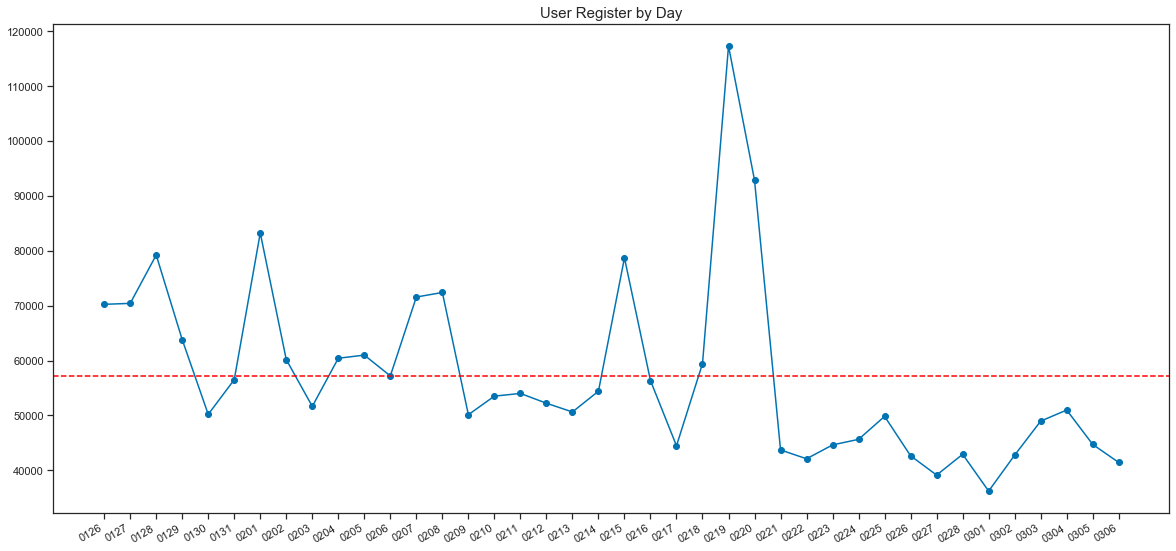

In [51]:
import matplotlib.dates as mdates

# user registered count by day
fig, ax = plt.subplots(figsize=(20, 10))

day_x = sorted(df_train['register_time'].dt.strftime('%m%d').unique())
day_y = df_train['user_id'].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
day_avg = sum(day_y) / len(day_x)
ax.plot_date(day_x, day_y, linestyle='solid')

#add average user registered
plt.axhline(y=day_avg, linestyle = '--', color='red')

#format
fig.autofmt_xdate()
ax.set_title('User Register by Day', fontsize=15)

### Insight:
1. Data was collected from the end of January to the start of March and we should be careful generalize our findings to other months

2. By looking at Feburary data, it clearly showed that there was marketing event going on between 17th to 21st, resulted in huge increase (almost 2x) in user registered. Needs to further investigate the user quality.

3. After the marketing event, user registered daily droped under average line. This might indicates that this user generation channel was saturated. 
    

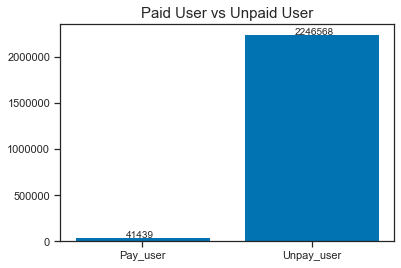

In [53]:
# count of paid user vs unpaid user
pay_count = df_train['pay_count'][df_train['pay_count'] > 0].count()
unpay_count = df_train['pay_count'][df_train['pay_count'] <= 0].count()

pay_data = {'Pay_user' : pay_count, 'Unpay_user' : unpay_count}
names = list(pay_data.keys())
values = list(pay_data.values())

fig, ax1 = plt.subplots()
bar = ax1.bar(names, values, align='center')
ax1.set_title('Paid User vs Unpaid User', fontsize=15)  

# adding value annotation
for i, v in enumerate(values):
    plt.text(i-0.1, v, str(v))
    
plt.show()

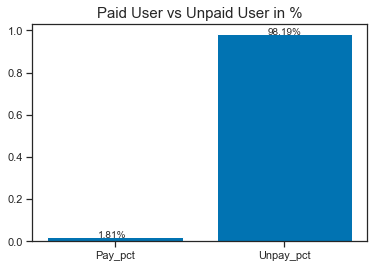

In [58]:
# percentage of paid user vs unpaid user
pay_pct = (df_train['pay_count'][df_train['pay_count'] > 0].count() / df_train['pay_count'].count())

unpay_pct = df_train['pay_count'][df_train['pay_count'] <= 0].count() /df_train['pay_count'].count()

pay_data = {'Pay_pct' : pay_pct, 'Unpay_pct' : unpay_pct}
names = list(pay_data.keys())
values = list(pay_data.values())

fig, ax = plt.subplots()
bar = ax.bar(names, values, align='center')
ax.set_title('Paid User vs Unpaid User in %', fontsize=15)  

# adding value annotation
for i, v in enumerate(values):
    plt.text(i-0.1, v, '{0:.2%}'.format(v)) #percentagize the value
    
plt.show()

### Insight: 
1. Paid user taks account for 1.81% of total user. Conversion rate will be calculated in other way (paid user/active user instead of tatal user).
    

Text(0, 0.5, 'Pay Frequency Count')

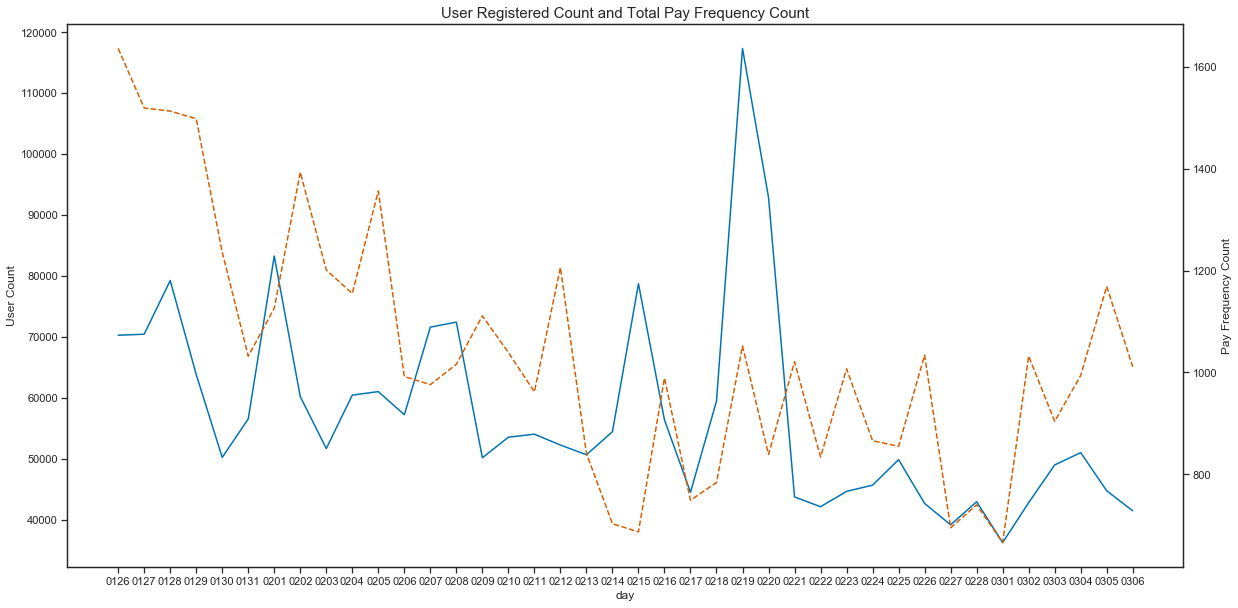

In [115]:
#combined visualization of new user registered and pay count
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = day_y
y2 = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
ax.set_ylabel('User Count')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-')
ax.set_title('User Registered Count and Total Pay Frequency Count', fontsize=15)

ax2 = ax.twinx()
ax2.plot(x, y2, linestyle='--', c='r')
ax2.set_ylabel('Pay Frequency Count')


### Insight: 
1. Even though there's a large group of user registered, it did not induce increases in pay frequency of users. It may indicates 2 problems: 1st choice of marketing channels and 2nd marketing strategy.

Text(0, 0.5, 'Pay Rate Count')

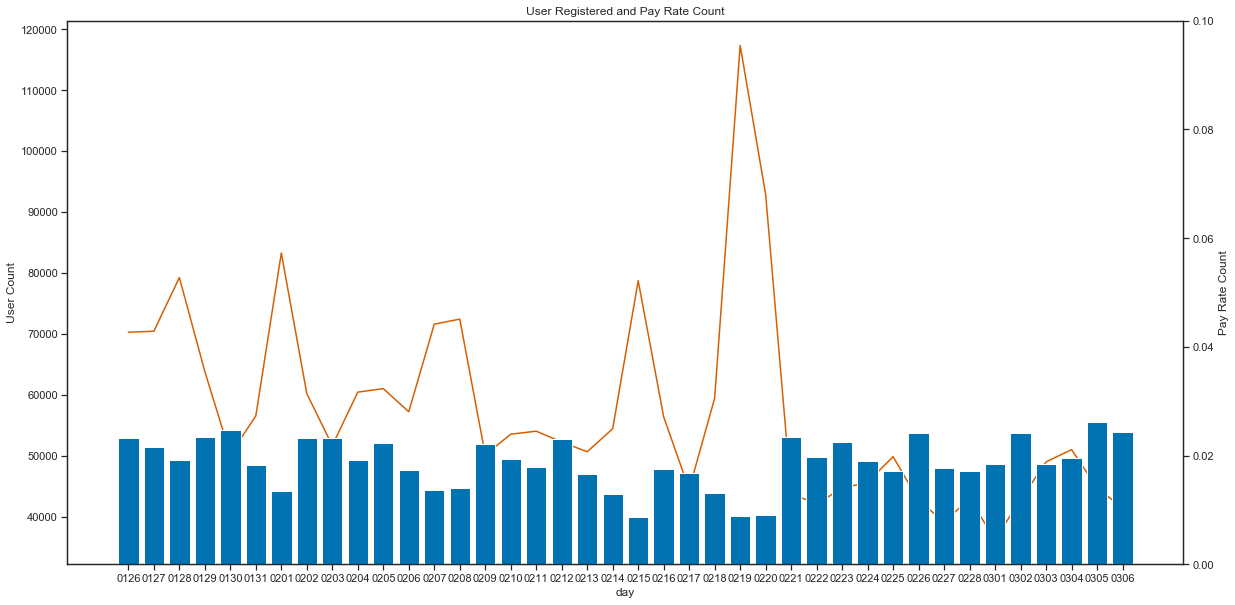

In [116]:
#combined visualization of new user registered and pay rate count
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = day_y
y2 = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()/day_y
ax.set_ylabel('User Count')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-', c='r')
ax.set_title('User Registered and Pay Rate Count')

ax2 = ax.twinx()
ax2.bar(x, y2)
ax2.set_ylim(0,.1)
ax2.set_ylabel('Pay Rate Count')


### Insight:
    1. Pay rate gradually decreased throughout Feburary, surprisingly dived during promotional days.
    
    2. By looking at pay frequency and pay rate, it strongly indicates the marketing event are generating low quality users, might considering reshape our marketing strategy or re-select our marketing channels. 

(array([0.]), array([39.]))

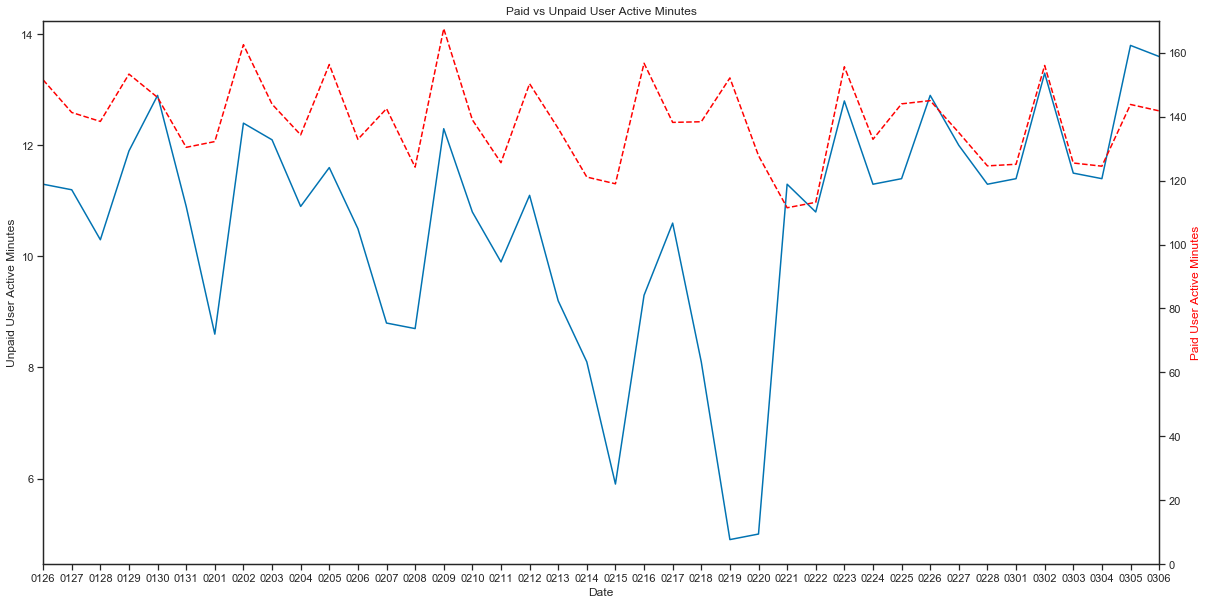

In [65]:
#Comparison between average user active minutes vs pay user vs unpay user
avg_online_min =round((df_train['avg_online_minutes'].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/day_y),1)
pay_user_per_day = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
pay_avg = round((df_train['avg_online_minutes'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/pay_user_per_day),1)

#plot the data
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
ax.plot(day_x, avg_online_min, linestyle='-')

#2nd y-axis
ax2 = ax.twinx()
ax2.plot(day_x, pay_avg, linestyle='--', c='red')
ax2.set_ylabel('Paid User Active Minutes', c='red')
ax2.set_ylim(0, 170)

#format graph
ax.set_ylabel('Unpaid User Active Minutes')
ax.set_xlabel('Date')
ax.set_title('Paid vs Unpaid User Active Minutes')
ax.set_xlim(day_x[0], day_x[-1])

### Insight:
    1. This combined line charts compared paid and unpaid user's active minutes.

    2. First, paid user are alomost 10x more active than unpaid user. 

    3. Second, during promotional events, paid user active minutes stayed consistent around the average, but unpaid user took a huge dip in active minutes, might indicating this promotional events was not focus on unpaid users. 

    4. Needs to further investigate the impact of this promotional event to see if it benefits the game or not.

Average Pay User Active Minutes: 140.18774584526693
Average User Active Minutes: 10.207489627790176


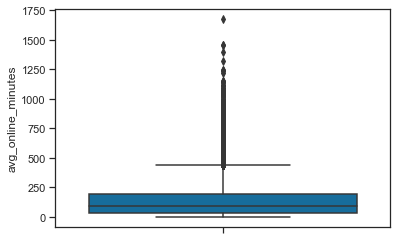

In [62]:
sns.boxplot(y=df_train['avg_online_minutes'][df_train['pay_count'] > 0])
print('Average Pay User Active Minutes:', df_train['avg_online_minutes'][df_train['pay_count'] > 0].mean())
print('Average User Active Minutes:', df_train['avg_online_minutes'].mean())

### Insight：
    1. Average user active for 10.2 minutes, while pay user active for 140 minutes.
    
    2. Quite a lot outliers indicated that there are some VVIP players exsiting.

## 2. Profit Analysis

In [75]:
sevday_profit = df_train['pay_price'].sum()
pay_user = df_train[df_train['pay_price'] != 0]
active_user = df_train[(df_train['avg_online_minutes'] >= 30) & (df_train['avg_online_minutes']<=24*60)]
pay_rate_active = pay_user['user_id'].count() / active_user['user_id'].count()
pay_rate_register = pay_user['user_id'].count() / df_train['user_id'].count()

print('pay_rate_active: %.2f' %pay_rate_active)
print('pay_rate_register: %.2f' %pay_rate_register)

pay_rate_active: 0.29
pay_rate_register: 0.02


In [70]:
#APRU = pay amount/active user
ARPU = pay_user['pay_price'].sum() / active_user['user_id'].count()
print('ARPU: %.2f' %ARPU)
ARPPU = pay_user['pay_price'].sum() / pay_user['user_id'].count()
print('ARPPU: %.2f' %ARPPU)

ARPU: 8.55
ARPPU: 29.52


### Insight:
    1. Conversion rate from active user is at 0.29 while from registered user is at 0.02. Top tier game average conversion rate is at 1.1%, so this game is doing pretty well in coverting paying players.
    
    2. ARPU is 8.55 and ARPPU is 29.52, same as previously, no benchmark to compare. Also to mention, denominator is active user instead of user count.

Text(0, 0.5, 'Predicted Average User Spend Per Day')

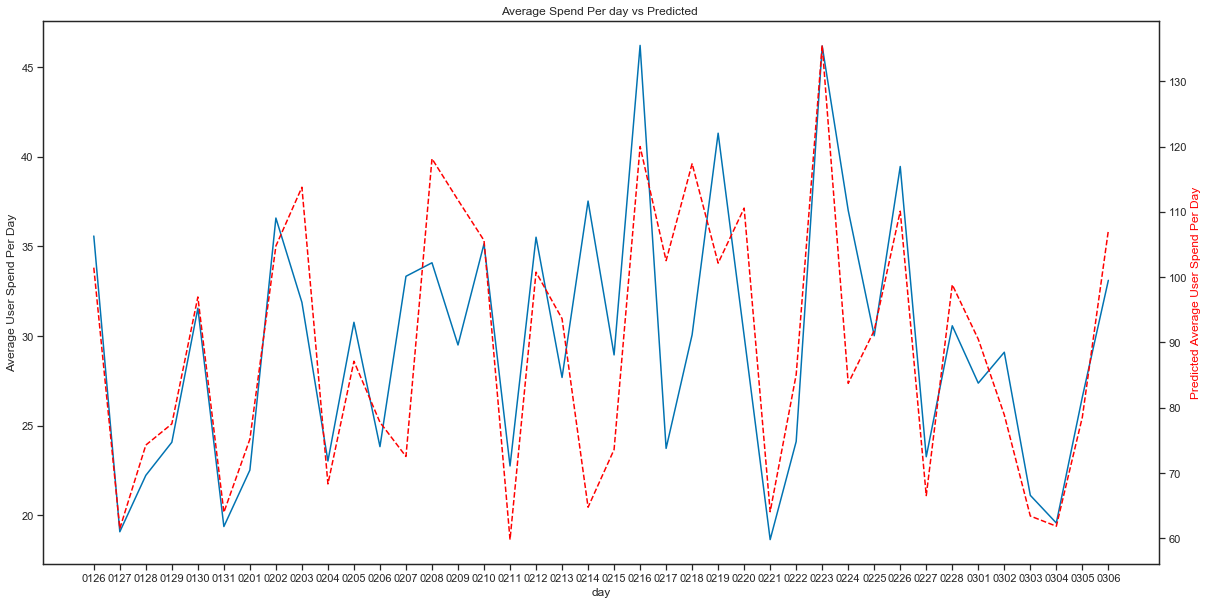

In [78]:
#comparison between 7 day pay user and Predicted 45 day pay user

fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = df_train['pay_price'][df_train['pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/df_train['pay_price'][df_train['pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
y2 = df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/ df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()

#format the graph
ax.set_ylabel('Average User Spend Per Day')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-')
ax.set_title('Average Spend Per day vs Predicted ')

ax2 = ax.twinx()
ax2.plot(x, y2, linestyle='--', c='red')
ax2.set_ylabel('Predicted Average User Spend Per Day', c='red')

In [77]:
print('Average User Spend Per Day: %.2f' %y1.mean())
print('Predicted Average User Spend Per Day: %.2f' %y2.mean())

Average User Spend Per Day: 29.56
Predicted Average User Spend Per Day: 89.30


### Insight:
    1. Average user spend per day vs predicted: 29.56 vs 89.3

    2. Average spend per day increased during marketing event from 17 to 21st, further proves that this event was focus on paid user to boost profits.

    3. However, big dip after marketing events, may indicate that the event saturated future consumption power

Users who did not spend in first 7 days makes up 4.53% of Prediction Sales
Users who spend in first 7 days makes up 95.47% of Prediction Sales
Total Sales in first 7 days makes up 29.82% of Prediction Sales


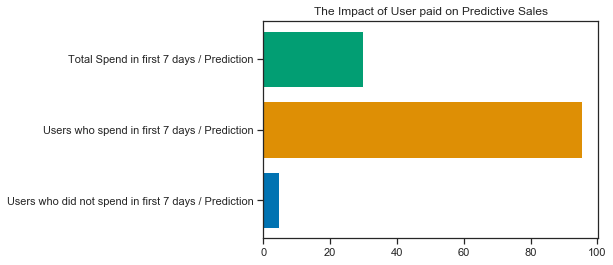

In [101]:
# percentage of 7day pay user to 45 day pay user
y_label = ['Users who did not spend in first 7 days / Prediction',  'Users who spend in first 7 days / Prediction', 'Total Spend in first 7 days / Prediction']
y1 = '{:.2%}'.format(df_train['prediction_pay_price'][df_train['pay_price'] == 0].sum() / df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].sum())
y2 = '{:.2%}'.format(df_train['prediction_pay_price'][df_train['pay_price'] != 0].sum() / df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].sum())
y3 ='{:.2%}'.format(df_train['pay_price'][df_train['pay_price'] != 0].sum() / df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].sum())
x_width = [y1, y3, y2]
y_pos = [1, 2, 3]

fig, ax = plt.subplots()
ax.barh(y1, 4.53)
ax.barh(y2, 95.47)
ax.barh(y3, 29.82)
ax.set_yticklabels(y_label)
ax.set_title('The Impact of User paid on Predictive Sales')

In [80]:
print('Users who did not spend in first 7 days makes up', y1, 'of Prediction Sales')
print('Users who spend in first 7 days makes up', y2, 'of Prediction Sales')
print('Total Sales in first 7 days makes up', y3, 'of Prediction Sales')

Users who did not spend in first 7 days makes up 4.53% of Prediction Sales
Users who spend in first 7 days makes up 95.47% of Prediction Sales
Total Sales in first 7 days makes up 29.82% of Prediction Sales


### Insight:
    1. Player who spend within first 7 days are highly likely to continue spending within the next 45 days. Data showed players who spend within 7 days contributed to 95.47% of sales generated of next 45 days.
    
    2. Total amouont of the first 7 days sales contributed to 29.82% of total sales within 45 days period.
    
    3. Only 4.53% of sales of 45 days are coming from players who did not spend within the first 7 days.
    
    4. Showed strong importance of inducing purchase behavior during first 7 days. 

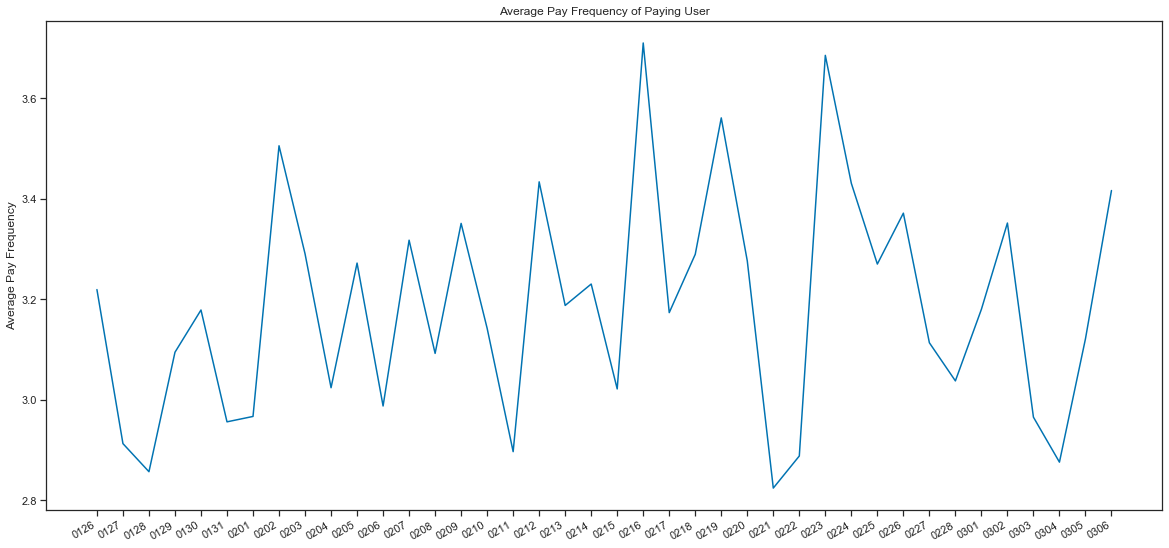

In [81]:
#pay frequency
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
avg_pay_count = df_train['pay_count'][df_train['pay_count'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/df_train['pay_count'][df_train['pay_count'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()

#plot and format
ax.plot(x, avg_pay_count)
ax.set_ylabel('Average Pay Frequency')
ax.set_title('Average Pay Frequency of Paying User')
fig.autofmt_xdate()

AxesSubplot(0.125,0.125;0.775x0.755)


count    41439.000000
mean         3.186226
std          4.218311
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        105.000000
Name: pay_count, dtype: float64

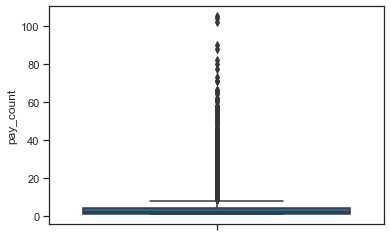

In [82]:
print(sns.boxplot(y=df_train['pay_count'][df_train['pay_count'] != 0]))
df_train['pay_count'][df_train['pay_count'] != 0].describe()

### Insight:
    1. Average paying frequency is 3.18 times, max at 105 times, 25% of players at least spend 4 times.
    
    2. During Feb.15th to 21st, avearge paying frequency peaked twice. Should further investigate to see what we have done right and replicate this. 

In [83]:
#get new dataframe based on user_id, building stronghold level, pay_count, pay_price 
user = df_train[['user_id', 'bd_stronghold_level', 'pay_count', 'pay_price']]

#aggregate values
table = pd.pivot_table(user, index=['bd_stronghold_level'], values=['user_id', 'pay_count',                                 'pay_price'], 
                       aggfunc={'user_id': 'count', 'pay_count': 'sum', 'pay_price': 'sum'})
user_pay = pd.DataFrame(table.to_records())

#aggregate pay user statistics
pay_number = user[user['pay_count'] > 0].groupby('bd_stronghold_level').user_id.count()
user_pay['pay_user_count'] = pay_number


user_pay['pay_rate'] = user_pay['pay_user_count'] / user_pay['user_id']
user_pay['pay_avgcount'] = user_pay['pay_count'] / user_pay['pay_user_count']
user_pay['pay_avgmoney'] = user_pay['pay_price'] / user_pay['pay_user_count']

user_pay = user_pay.rename(columns = {'user_id' : 'user_count'})
user_pay = user_pay[['bd_stronghold_level', 'user_count','pay_user_count','pay_count', 'pay_rate', 'pay_avgcount', 'pay_avgmoney', 'pay_price']]

user_pay

,bd_stronghold_level,user_count,pay_user_count,pay_count,pay_rate,pay_avgcount,pay_avgmoney,pay_price
0,0,940446,4324,9454,0.004598,2.186401,15.674019,67774.46
1,1,305723,500,843,0.001635,1.686000,8.257140,4128.57
2,2,283449,775,1315,0.002734,1.696774,10.430774,8083.85
3,3,158473,793,1428,0.005004,1.800757,9.324994,7394.72
4,4,174717,949,1599,0.005432,1.684932,7.906228,7503.01
5,5,161211,1259,2008,0.007810,1.594917,5.103193,6424.92
6,6,90890,1924,2988,0.021168,1.553015,3.844657,7397.12
7,7,69298,3424,5711,0.049410,1.667932,4.418192,15127.89
8,8,52106,5507,10518,0.105688,1.909933,5.765175,31748.82
9,9,31809,8584,20533,0.269861,2.392008,8.545744,73356.67


Text(0.5, 1.0, '#1 Pay Conversion Rate')

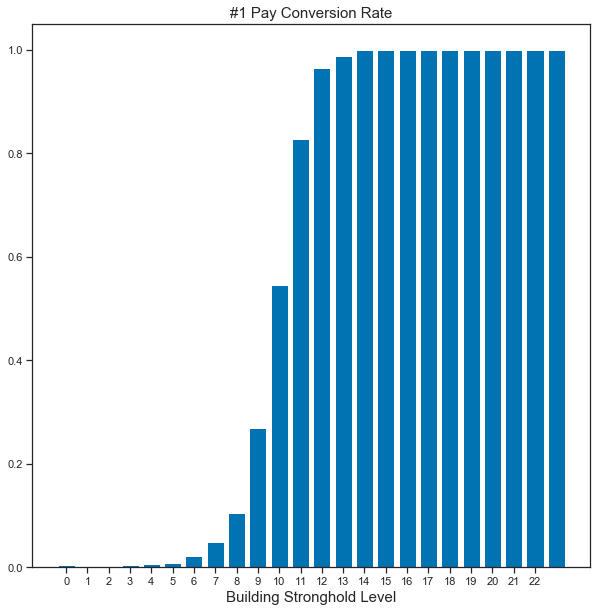

In [105]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['pay_rate'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('#1 Pay Conversion Rate', fontsize = 15)

Text(0.5, 1.0, '#2 Average Pay Frequence Count Per Player')

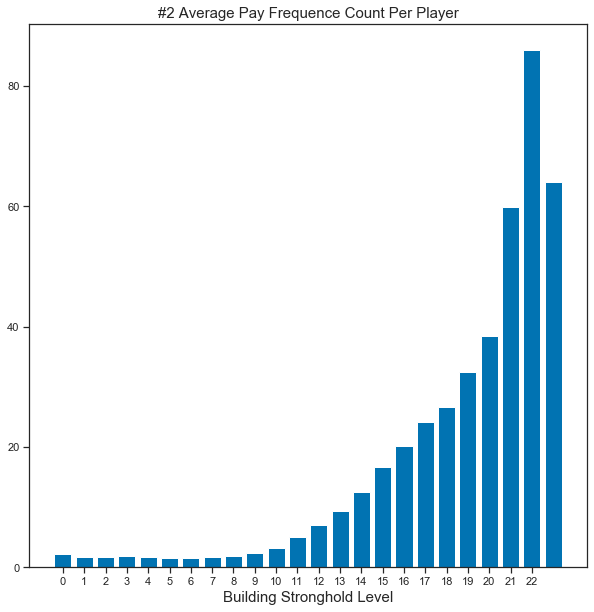

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['pay_avgcount'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('#2 Average Pay Frequence Count Per Player', fontsize = 15)

Text(0.5, 1.0, '#3 Average Pay Amount Per Player')

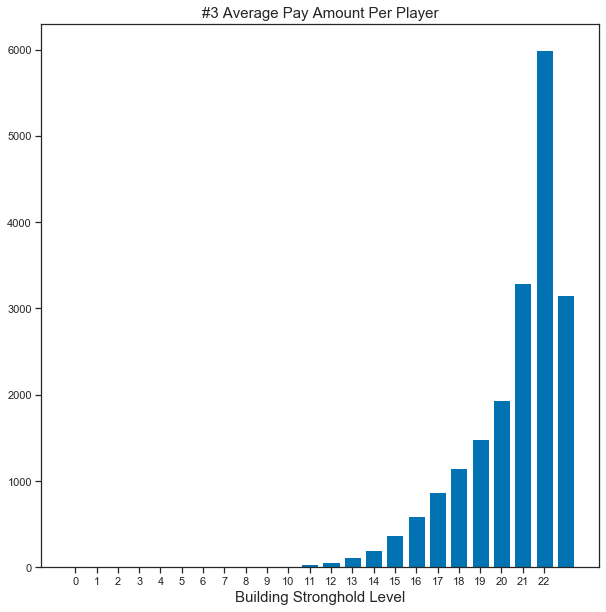

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['pay_avgmoney'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('#3 Average Pay Amount Per Player', fontsize = 15)

Text(0.5, 1.0, '#4 Player Count')

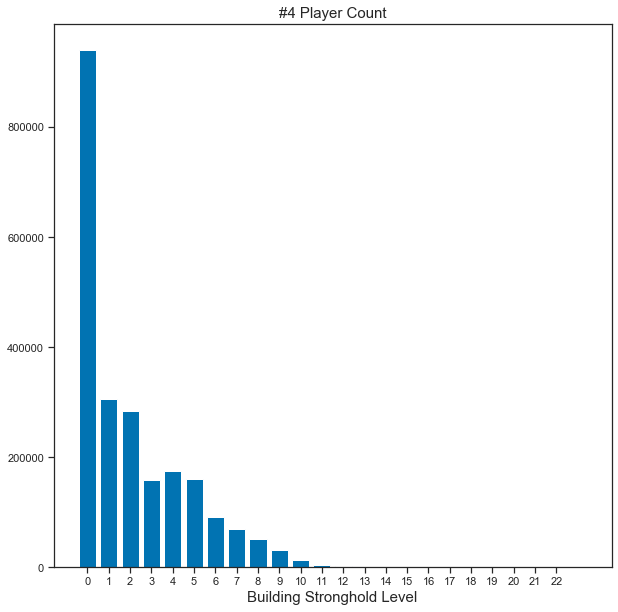

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['user_count'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('#4 Player Count', fontsize = 15)

### Insight:
    1. Graph #3 average pay amount per player showed that players' spend starts at level 10 as well as increase in pay conversion rate from graph #1.
    
    2. The majority of users stopped at at level 10 and users who reached beyond level 10 have more willingness to pay, which means the game operation team should focus on how to guide users smoothly exceed level 10.
    
    3. Also need to investigate what the game has done right at level 22 since the data showed a huge increase in pay amount at level 22. Different mode/items/feature etc. at level 22 can all contributed to this boost in sales. 
    
    4. The graph showed that all players have spend some amount of money starting from level 13/14, meaning monetization from this point will be very reasonable and acceptable. 

## 3. Content Analysis
    Goals: through the analysis of players' in game behavior, such as game item usage, top visited features/modes, etc., we could draw useful insights to better planning game feature development, marketing events, targeting ads. 

In [89]:
# Player PVE and PVP analysis
PVP_battle_paid = round(df_train['pvp_battle_count'][df_train['pay_price'] != 0].mean(), 2) 
PVP_launch_paid = round(df_train['pvp_lanch_count'][df_train['pay_price'] != 0].mean(), 2) 
PVP_win_paid = round(df_train['pvp_win_count'][df_train['pay_price'] != 0].mean(), 2) 
PVP_battle_unpaid = round(df_train['pvp_battle_count'][df_train['pay_price'] == 0].mean(), 2) 
PVP_launch_unpaid = round(df_train['pvp_lanch_count'][df_train['pay_price'] == 0].mean(), 2) 
PVP_win_unpaid = round(df_train['pvp_win_count'][df_train['pay_price'] == 0].mean(), 2) 
PVE_battle_paid = round(df_train['pve_battle_count'][df_train['pay_price'] != 0].mean(), 2) 
PVE_launch_paid = round(df_train['pve_lanch_count'][df_train['pay_price'] != 0].mean(), 2) 
PVE_win_paid = round(df_train['pve_win_count'][df_train['pay_price'] != 0].mean(), 2) 
PVE_battle_unpaid = round(df_train['pve_battle_count'][df_train['pay_price'] == 0].mean(), 2) 
PVE_launch_unpaid = round(df_train['pve_lanch_count'][df_train['pay_price'] == 0].mean(), 2) 
PVE_win_unpaid = round(df_train['pve_win_count'][df_train['pay_price'] == 0].mean(), 2) 

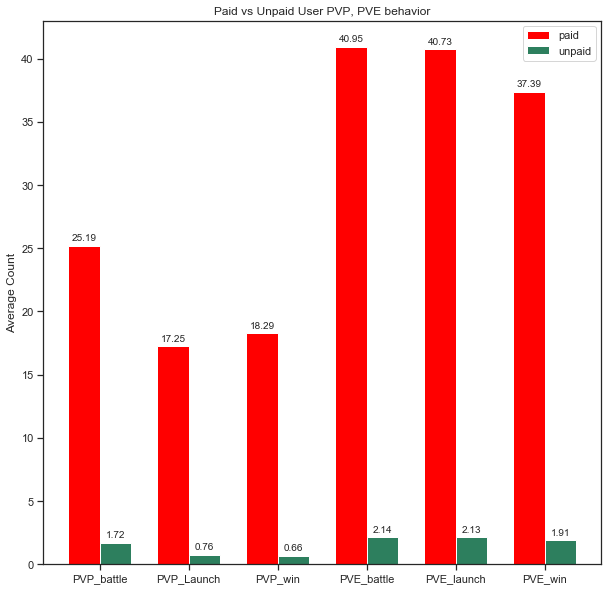

In [90]:
# paid vs unpaid user PVP, PVE behavior
labels = ['PVP_battle', 'PVP_Launch', 'PVP_win', 'PVE_battle','PVE_launch', 'PVE_win']
Group1 = [PVP_battle_paid, PVP_launch_paid, PVP_win_paid, PVE_battle_paid, PVE_launch_paid, PVE_win_paid]
Group2 = [PVP_battle_unpaid, PVP_launch_unpaid, PVP_win_unpaid, PVE_battle_unpaid, PVE_launch_unpaid, PVE_win_unpaid]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(x-width/2, Group1, width, label='paid', color='red')
rect2 = ax.bar(x+width/2, Group2, width, label='unpaid', color='#2d7f5e')

#format
ax.set_ylabel('Average Count')
ax.set_title('Paid vs Unpaid User PVP, PVE behavior')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)
autolabel(rect2)


plt.show()


### Insights
    1. players tends to play more PVE mode no matter they paid or not.
    
    2. Paid users are 22x more likely to launch a PVP battal than unpaid user, 19x more likely to launch a PVE battle.

Paid vs Unpaid in win rate under PVP & PVE Mode

In [91]:
pvpwin_pct_paid = df_train['pvp_win_count'][df_train['pay_price'] != 0].sum()/df_train['pvp_battle_count'][df_train['pay_price'] != 0].sum()
pvpwin_pct_unpaid = df_train['pvp_win_count'][df_train['pay_price'] == 0].sum()/df_train['pvp_battle_count'][df_train['pay_price'] == 0].sum()
pvewin_pct_paid = df_train['pve_win_count'][df_train['pay_price'] != 0].sum()/df_train['pve_battle_count'][df_train['pay_price'] != 0].sum()
pvewin_pct_unpaid = df_train['pve_win_count'][df_train['pay_price'] == 0].sum()/df_train['pve_battle_count'][df_train['pay_price'] == 0].sum()

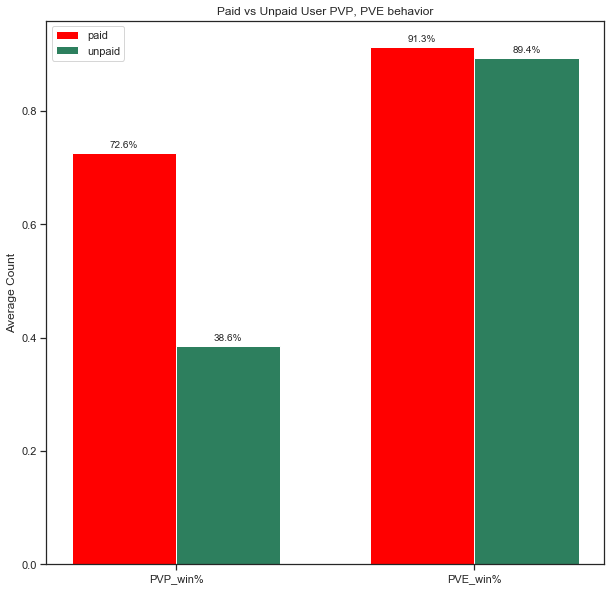

In [92]:
labels = ['PVP_win%', 'PVE_win%']
Group1 = [pvpwin_pct_paid, pvewin_pct_paid]
Group2 = [pvpwin_pct_unpaid, pvewin_pct_unpaid]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(x-width/2, Group1, width, label='paid', color='red')
rect2 = ax.bar(x+width/2, Group2, width, label='unpaid', color='#2d7f5e')

#format
ax.set_ylabel('Average Count')
ax.set_title('Paid vs Unpaid User PVP, PVE behavior')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)
autolabel(rect2)


plt.show()


### Insight
    1. Paid users's win rate in PVP mode almost doubled compared to unpaid users.
    
    2. Win rate under PVE mode are almost the same, could mean PVE mode is also very easy for unpaid users. Slightly increase PVE mode difficulty could potentially increase user willingness to pay.

Paid vs Unpaid Resource Usage

In [109]:
#setup
resource_paid = df_train[df_train['pay_count'] != 0]
resource_unpaid = df_train[df_train['pay_count'] == 0]

wood_avg = [resource_paid['wood_reduce_value'].mean(), resource_unpaid['wood_reduce_value'].mean()]
stone_avg = [resource_paid['stone_reduce_value'].mean(), resource_unpaid['stone_reduce_value'].mean()]
ivory_avg = [resource_paid['ivory_reduce_value'].mean(), resource_unpaid['ivory_reduce_value'].mean()]
meat_avg = [resource_paid['meat_reduce_value'].mean(), resource_unpaid['meat_reduce_value'].mean()]
magic_avg = [resource_paid['magic_reduce_value'].mean(), resource_unpaid['magic_reduce_value'].mean()]

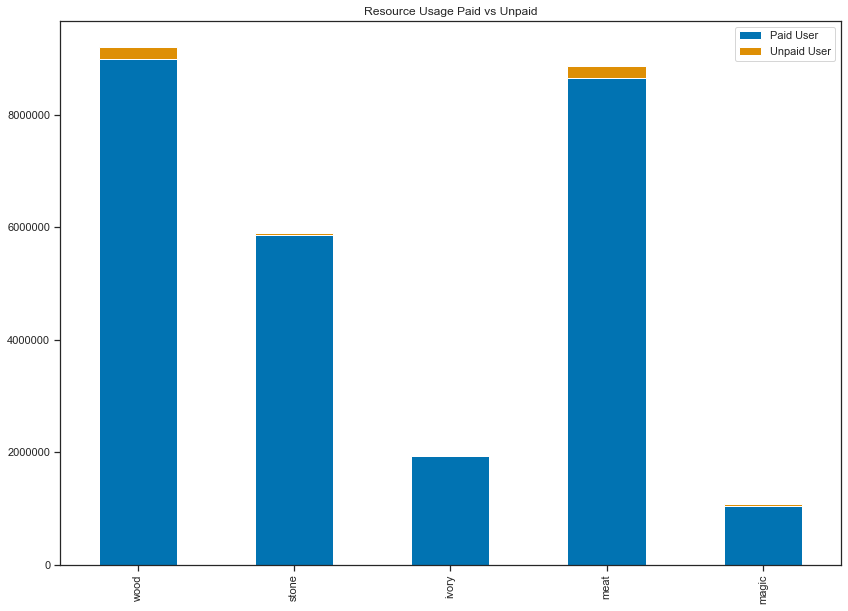

In [96]:
resource_usage = {'Paid User': [wood_avg[0], stone_avg[0], ivory_avg[0], meat_avg[0], magic_avg[0]], 
                 'Unpaid User': [wood_avg[1], stone_avg[1], ivory_avg[1], meat_avg[1], magic_avg[1]]}
resource = pd.DataFrame(resource_usage, index = ['wood', 'stone', 'ivory', 'meat', 'magic'])

resource.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Resource Usage Paid vs Unpaid')
plt.show()

### Insight
    1. Woods and meat were the most popular resource due to their importance on leveling up.
    
    2. However, we barely see any usage on ivory, stones and magic from unpaid users. This might indicate that these resource are more expensive and can better demonstrate users' true purchasing power.
    

### Notes from Previous Analysis
It's pretty obvious that paid user will be more likely to purchase and use compared to unpaid users. Because of resoure usage analysis and behavior analysis only proves the commen sense, we should divide the paid group users to investigate what game item/resource usage really affect purchase behavior? 

####  Whales vs Other
    Whales: who spend at leaset 500 and reached to level 10
    Others: spend less than 500 but greater than 0 and reached to level 10

In [112]:
whales = df_train[(df_train['pay_price'] >= 500) & (df_train['bd_stronghold_level'] >= 10)]
others = df_train[(df_train['pay_price'] <500 ) & (df_train['pay_price'] >0 ) &(df_train['bd_stronghold_level'] >= 10) ]

wood_avg = [whales['wood_reduce_value'].mean(), others['wood_reduce_value'].mean()]
stone_avg = [whales['stone_reduce_value'].mean(), others['stone_reduce_value'].mean()]
ivory_avg = [whales['ivory_reduce_value'].mean(), others['ivory_reduce_value'].mean()]
meat_avg = [whales['meat_reduce_value'].mean(), others['meat_reduce_value'].mean()]
magic_avg = [whales['magic_reduce_value'].mean(), others['magic_reduce_value'].mean()]

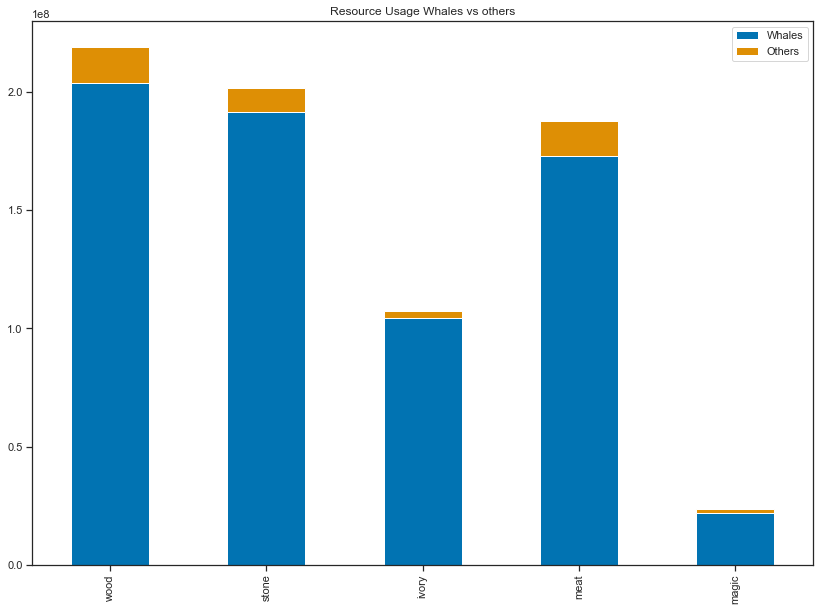

In [113]:
resource_usage2 = {'Whales': [wood_avg[0], stone_avg[0], ivory_avg[0], meat_avg[0], magic_avg[0]], 
                 'Others': [wood_avg[1], stone_avg[1], ivory_avg[1], meat_avg[1], magic_avg[1]]}
resource2 = pd.DataFrame(resource_usage2, index = ['wood', 'stone', 'ivory', 'meat', 'magic'])

resource2.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Resource Usage Whales vs others')
plt.show()

### Insight
    1. Compare to wood, stone and meat, ivory and magic are less likely used by both whales and other users, suggesting these resources are more rare and valuable to the game. Suggesting ivory and magic usage can better show users' spending ability

Whales vs Other on Acceleration Item Usage

In [99]:
whales = df_train[(df_train['pay_price'] >= 500) & (df_train['bd_stronghold_level'] >= 10)]
others = df_train[(df_train['pay_price'] <500) & (df_train['bd_stronghold_level'] >= 10)]

genral_avg = [whales['general_acceleration_reduce_value'].mean(), others['general_acceleration_reduce_value'].mean()]
building_avg = [whales['building_acceleration_reduce_value'].mean(), others['building_acceleration_reduce_value'].mean()]
reaserch_avg = [whales['reaserch_acceleration_reduce_value'].mean(), others['reaserch_acceleration_reduce_value'].mean()]
training_avg = [whales['training_acceleration_reduce_value'].mean(), others['training_acceleration_reduce_value'].mean()]
treament_avg = [whales['treatment_acceleration_reduce_value'].mean(), others['treatment_acceleration_reduce_value'].mean()]

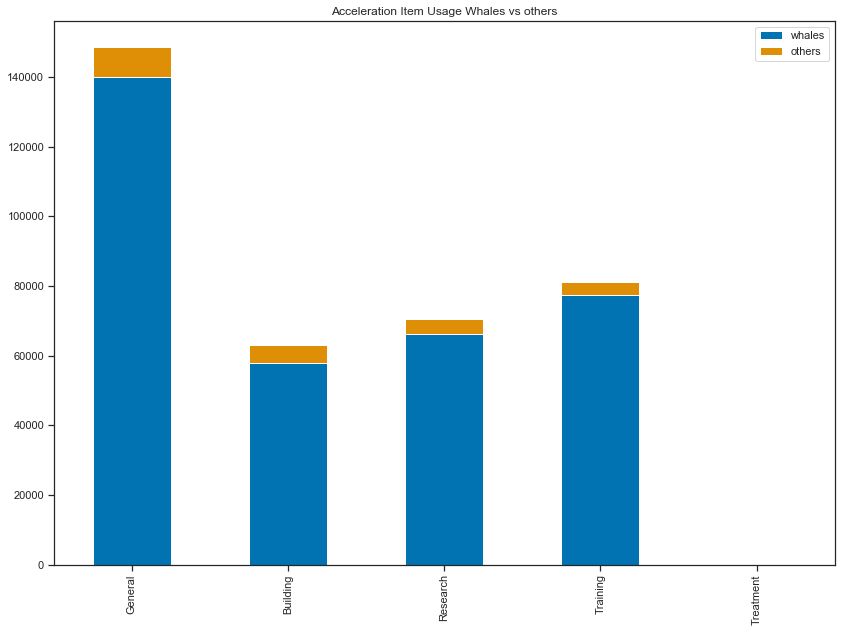

In [100]:
resource_usage3 =  {'whales':[genral_avg[0], building_avg[0], reaserch_avg[0], training_avg[0], treament_avg[0]], 
        'others':[genral_avg[1], building_avg[1], reaserch_avg[1], training_avg[1], treament_avg[1]]}
resource3 = pd.DataFrame(resource_usage3, index = ['General', 'Building', 'Research', 'Training', 'Treatment'])

resource3.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Acceleration Item Usage Whales vs others')
plt.show()

### Insight
    1. In general, both whale and other users are more likely to user category general acceleration items.
    
    2. Meanwhile, treament type item has the least usage, barely can be seen from the chart , indicating this item was not very well integrated to the game. It may suggesting issues from pricing, design, integration etc. Details about treatment usage needs to talk to game dev team to have a better understanding.

# Conclusion and Reccomendations

## A. New User Analysis 

    1. The promotional events attracts approxiamtely 2x more users than previous peak registration count and increased average spend per user per day. However, we also saw a large dip in pay conversion rate as well as a dip in active minutes of unpaid user. Total pay frequency and average pay frequency did not show big changes under the promotion event. It suggests that even though we effectively attracted users but fewer of them became paid core users compare to average. 

    2. After the promotional event, metrics like pay conversion rate and user active minutes tend to gradually increase to average level and stablize. However, it did not demonstrate a visible difference before and after promotional events. 

#### Recommendations
    1. The promotional event did a good job on attracting user registration. However, these users are not too valuable to the game since they underperformed in core metrics like pay conversion rate and average active minutes. 
    
    2. It suggestes either we choose a better channel to acquire customers or optimize our marketing strategy so that we can meet our ultimate goal: attract valuable users. 
    
    3. While we have the promotional event going on, we should also monitor other user segments' behavior. This promotional event clearly demonstrated detriment on unpaid users' experience. Not only monitoring, accurately targeted ad placement on user segments will also do the job. 
    
## B. Profitability Analysis
    1. Users who spend in first 7 days will also be highly likely spend within next 45 days.
    
    2. Level 10 is another threshold to get users pay. The majority of users stayed below level 10 and pay rate dramatically increased starting from level 10. Users who exceed level 13 have 100% pay conversion rate. 
    
#### Recommendations
    1. There are two thresholds that game operation should be aware of: 7 day and level 10. This suggesting that operation team should design strategies that could induce and guide users to pay within the first 7 days and exceed level 10. 
    
    2. It is very important to get users exceed level 10 and pay in first 7 days since data because both indicators are correlated to the profitability of the game. 
 
## C. Content Analysis
    1. Paid users outperformed unpaid users in both mode: PVP and PVE. They are also more likely to launch and win a batter under both modes. However, both user categories enjoys more of PVE mode than PVP mode. 
    
    2. Win rate of paid users and unpaid users are alsmot the same, suggesting PVE mode are easier for users doesn't matter they pay or not.
    
    3. Wood and meat are 2 most used items for both paid and unpaid users. Ivory and magic can be a better indicator on users spending ability.
    
    4. Acceleration items showed the same pattern as resource items, paid users tends to spend a lot more on all items.
    
    5. Treatment category items showed the least usage, alomost can't be seen from the chart. 
    
#### Recommendations
    1. Paid users and unpaid users are almost indistinguishable under PVE mode. Suggesting slightly increase the PVE mode difficulty so that unpaid users will have a small disadvantage un both PVP and PVE mode, result in inducing payment. This may need A/B testing so we can find the perfect balancing point. 
    
    2. Wood, meat, stones and general acceleration item are most used item by both paid and unpaid users. Limited sales on these items could induce sales from both categories, but once again A/B test is needed to monitor the side effects.
    
    3. Less unpaid users user ivory and magic, suggesting these two items are more attractive to the paid users. Promotions around these two items targeting paid users may have a positive effect on profitability. 
    
    4. Suggesting a redesign on magic itema and treatment item. By looking at the chart, a disproportionate low usage could mean bad in-game integration.